# Without Wages

In [1]:
function generate_points(N, range)
    mapPoints=reshape([], 0, 0)
    pointsArray=reshape([],0,0)
    mapPoints= zeros(Int64, range, range)
    pointsArray = zeros(Int64, N, 2)
    i=1
    while i<=N
        flag=0
        tmpFirst = rand(1: range)
        tmpSecond = rand(1 : range)
        for j=1:N
            if mapPoints[tmpFirst, tmpSecond]==1
                    flag=1
             end
        end
        if flag==0            
            mapPoints[tmpFirst, tmpSecond]=1
            pointsArray[i, 1]= tmpFirst
            pointsArray[i, 2]= tmpSecond
            i+=1
        end
    end
    return mapPoints, pointsArray
end

generate_points (generic function with 1 method)

In [2]:
function energyOfTheSystem(array, N)
    G=50
    sum = 0
    for i=1:N
        for j=i+1:N
            firstX = array[i, 1]
            firstY = array[i, 2]
            secX = array[j, 1]
            secY = array[j, 2]
            tmp = sqrt((secX-firstX)^2 + (secY-firstY)^2)
            sum+= G/tmp
        end
    end
    return sum
end

energyOfTheSystem (generic function with 1 method)

In [3]:
function simulatedAnnealing(map, array, N, Temp)
    while Temp>=1
        x0=rand(1:N)
        signArray=[-1 -1; -1 0; -1 1; 0 -1; 0 0; 0 1; 1 -1 ; 1 0 ;1 1]
        bestSign=0
        bestMap=copy(map)
        bestArray = copy(array)
        bestEnergy = typemax(Float64)
        for i=1:9
            if array[x0,1]+signArray[i, 1]>=1 && array[x0,1]+signArray[i,1]<=100
                if array[x0, 2]+signArray[i, 2]>=1  && array[x0, 2]+signArray[i, 2]<=100
                    if map[array[x0,1]+signArray[i, 1], array[x0,2]+signArray[i, 2]]!=1
                        tmpMap = copy(map)
                        tmpMap[array[x0,1], array[x0,2]]=0
                        tmpMap[array[x0,1]+signArray[i,1], array[x0,2]+signArray[i,2]]=1
                        tmpArray= copy(array)
                        tmpArray[x0, 1]=tmpArray[x0,1]+signArray[i,1]
                        tmpArray[x0, 2]=tmpArray[x0,2]+signArray[i,2]
                        calculatedEnergy = energyOfTheSystem(tmpArray, N)
                        if calculatedEnergy< bestEnergy
                            bestEnergy = calculatedEnergy
                            bestMap = copy(tmpMap)
                            bestArray= copy(tmpArray)
                            bestSign = i
                        end
                    end
                end
            end
        end
        
        delta = energyOfTheSystem(bestArray, N) - energyOfTheSystem(array, N)
        probability = exp(-delta/Temp)
        u=rand(Float64)
        if delta < 0
            array = copy(bestArray)
            map = copy(bestMap)
        elseif probability > u
            array = copy(bestArray)
            map = copy(bestMap)
        end
        Temp*=0.999
    end
    return map, array
end

simulatedAnnealing (generic function with 1 method)

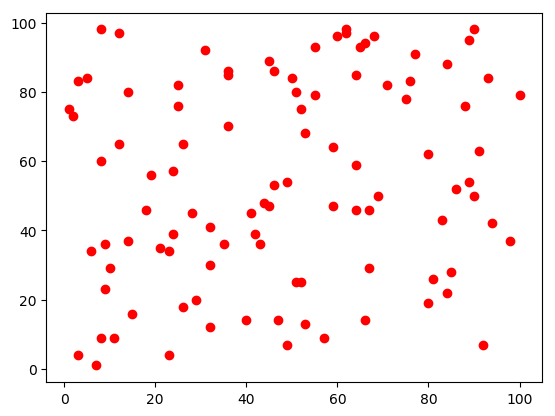

Energy: 7293.615309465831

In [4]:
using PyPlot

N=100
range=100
map, array= generate_points(N, range)
PyPlot.plot(array[:,1], array[:,2], "ro")
energy1 = energyOfTheSystem(array, N)
print("Energy: $energy1")

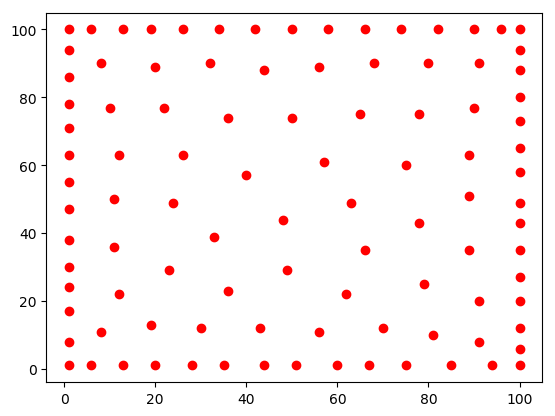

Energy: 5568.581948267554

In [5]:
Temperature = 100
mapRes, arrayRes = simulatedAnnealing(map, array, N, Temperature)
PyPlot.plot(arrayRes[:,1], arrayRes[:,2], "ro")
energy1 = energyOfTheSystem(arrayRes, N)
print("Energy: $energy1")

# With Weights

In [6]:
function generate_points2(N, range, weightsRange)
    mapPoints=reshape([], 0, 0)
    pointsArray=reshape([],0,0)
    mapPoints= zeros(Int64, range, range)
    pointsArray = zeros(Int64, N, 3)
    i=1
    while i<=N
        flag=0
        tmpFirst = rand(1: range)
        tmpSecond = rand(1 : range)
        tmpWeight = rand(1 : weightRange)
        for j=1:N
            if mapPoints[tmpFirst, tmpSecond]==1
                    flag=1
             end
        end
        if flag==0            
            mapPoints[tmpFirst, tmpSecond]=1
            pointsArray[i, 1]= tmpFirst
            pointsArray[i, 2]= tmpSecond
            pointsArray[i, 3]= tmpWeight
            i+=1
        end
    end
    return mapPoints, pointsArray
end

generate_points2 (generic function with 1 method)

In [7]:
function energyOfTheSystem2(array, N)
    G=50
    sum = 0
    for i=1:N
        for j=i+1:N
            firstX = array[i, 1]
            firstY = array[i, 2]
            secX = array[j, 1]
            secY = array[j, 2]
            tmp = sqrt((secX-firstX)^2 + (secY-firstY)^2)
            
            m1 = array[i, 3]
            m2 = array[j, 3]
            sum+= m1*m2*G/tmp
        end
    end
    return sum
end

energyOfTheSystem2 (generic function with 1 method)

In [8]:
function simulatedAnnealing2(map, array, N, Temp)
    while Temp>=1
        x0=rand(1:N)
        signArray=[-1 -1; -1 0; -1 1; 0 -1; 0 0; 0 1; 1 -1 ; 1 0 ;1 1]
        bestSign=0
        bestMap=copy(map)
        bestArray = copy(array)
        bestEnergy = typemax(Float64)
        for i=1:9
            if array[x0,1]+signArray[i, 1]>=1 && array[x0,1]+signArray[i,1]<=100
                if array[x0, 2]+signArray[i, 2]>=1  && array[x0, 2]+signArray[i, 2]<=100
                    if map[array[x0,1]+signArray[i, 1], array[x0,2]+signArray[i, 2]]!=1
                        tmpMap = copy(map)
                        tmpMap[array[x0,1], array[x0,2]]=0
                        tmpMap[array[x0,1]+signArray[i,1], array[x0,2]+signArray[i,2]]=1
                        tmpArray= copy(array)
                        tmpArray[x0, 1]=tmpArray[x0,1]+signArray[i,1]
                        tmpArray[x0, 2]=tmpArray[x0,2]+signArray[i,2]
                        calculatedEnergy = energyOfTheSystem2(tmpArray, N)
                        if calculatedEnergy< bestEnergy
                            bestEnergy = calculatedEnergy
                            bestMap = copy(tmpMap)
                            bestArray= copy(tmpArray)
                            bestSign = i
                        end
                    end
                end
            end
        end
        
        delta = energyOfTheSystem2(bestArray, N) - energyOfTheSystem2(array, N)
        probability = exp(-delta/Temp)
        u=rand(Float64)
        if delta < 0
            array = copy(bestArray)
            map = copy(bestMap)
        elseif probability > u
            array = copy(bestArray)
            map = copy(bestMap)
        end
        Temp*=0.999
    end
    return map, array
end

simulatedAnnealing2 (generic function with 1 method)

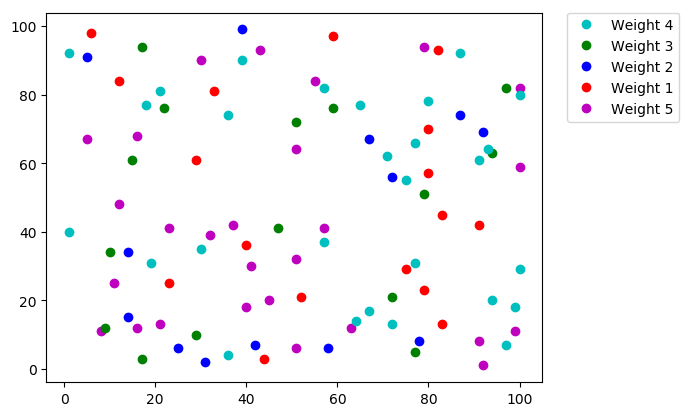

Energy: 75557.0790940882

In [9]:
using PyPlot

N=100
range=100
weightRange=5
map, array= generate_points2(N, range, weightRange)

colour=["ro","bo","go","co","mo", "yo","ko"]
colourLabel= [0, 0, 0, 0, 0, 0, 0]

for i=1:N
    if colourLabel[array[i,3]]==0
        toLabel=array[i,3]
        PyPlot.plot(array[i,1], array[i,2], colour[array[i,3]], label="Weight $toLabel")
        colourLabel[array[i,3]]=1
    else
        PyPlot.plot(array[i,1], array[i,2], colour[array[i,3]])
    end
end
PyPlot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
energy1 = energyOfTheSystem2(array, N)
print("Energy: $energy1")

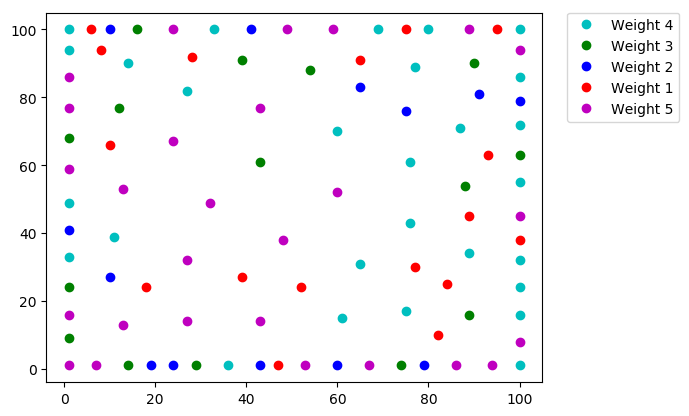

Energy: 61310.36220016622

In [10]:
Temperature = 100
mapRes, arrayRes = simulatedAnnealing2(map, array, N, Temperature)
colourLabel= [0, 0, 0, 0, 0, 0, 0]

for i=1:N
    if colourLabel[arrayRes[i,3]]==0
        toLabel=arrayRes[i,3]
        PyPlot.plot(arrayRes[i,1], arrayRes[i,2], colour[arrayRes[i,3]], label="Weight $toLabel")
        colourLabel[arrayRes[i,3]]=1
    else
        PyPlot.plot(arrayRes[i,1], arrayRes[i,2], colour[arrayRes[i,3]])
    end
end
PyPlot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
energy1 = energyOfTheSystem2(arrayRes, N)
print("Energy: $energy1")

# One big mass

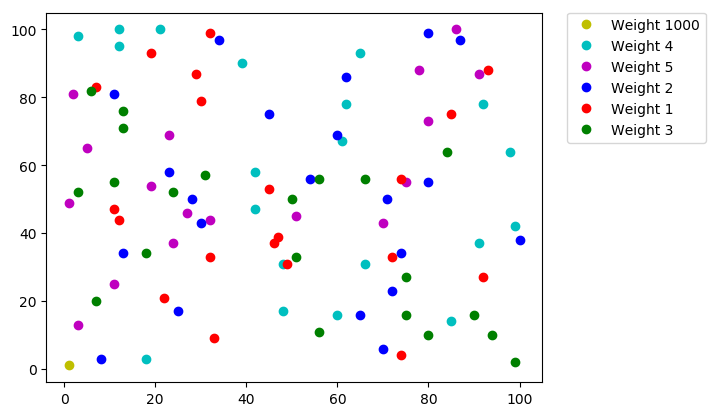

Energy: 308234.7907774901

In [11]:
N=100
range=100
weightRange=5
map, array= generate_points2(N, range, weightRange)
map[array[1,1],array[1,2]]=0
map[1,1]=1
array[1,:]=[1 1 1000]
colour=["ro","bo","go","co","mo", "yo","ko"]
colourLabel= [0, 0, 0, 0, 0, 0, 0]

for i=1:N
    tmp=array[i,3]
    if tmp==1000
        tmp=6
    end
    if colourLabel[tmp]==0
        toLabel=array[i,3]
        PyPlot.plot(array[i,1], array[i,2], colour[tmp], label="Weight $toLabel")
        colourLabel[tmp]=1
    else
        PyPlot.plot(array[i,1], array[i,2], colour[tmp])
    end
end
PyPlot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
energy1 = energyOfTheSystem2(array, N)
print("Energy: $energy1")

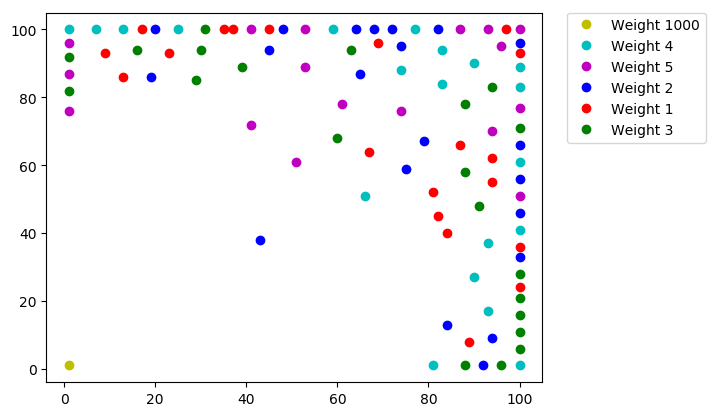

Energy: 202942.19130766517

In [12]:
Temperature = 100
mapRes, arrayRes = simulatedAnnealing2(map, array, N, Temperature)
colourLabel= [0, 0, 0, 0, 0, 0, 0]

for i=1:N
    tmp=arrayRes[i,3]
    if tmp==1000
        tmp=6
    end
    if colourLabel[tmp]==0
        toLabel=arrayRes[i,3]
        PyPlot.plot(arrayRes[i,1], arrayRes[i,2], colour[tmp], label="Weight $toLabel")
        colourLabel[tmp]=1
    else
        PyPlot.plot(arrayRes[i,1], arrayRes[i,2], colour[tmp])
    end
end
PyPlot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
energy1 = energyOfTheSystem2(arrayRes, N)
print("Energy: $energy1")